# Projeto
## Integrantes do Grupo:
  - Lucas Henrique Antoneli Flaquer - 180952
  - Jean Augusto Bauch - 180375
  - Vinícius Espinosa de Oliveira - 180853
  - Samel Ferraz de Araujo - 180207

## Sobre a Base de Dados

Link da base: https://archive.ics.uci.edu/ml/datasets/Adult
OBS: A base original possui apenas as linhas, sem o cabeçalho. Tivemos que colocar na mão os cabeçalhos da base para que seja possível executa-la

## Base Escolhida: Adult Data Set
Uma base de dados que informa se um cidadão norte americano tem ou não uma renda maior que 50mil/ano de acordo com os parâmetros do censo como sexo, idade, grau de escolaridade, país de origem, dentre outros.

## Atributos (Português)
A base de dados conta com os seguintes atributos que poderão ser utilizados para descobrir se a pessoa possui ou não uma renda maior do que 50mil/ano
* Idade
* Classe operária
* Peso
* Escolaridade
* Anos de escolaridade
* Estado civil
* Ocupação
* Relação
* Raça
* Sexo
* Ganho de capital
* Perda de capital
* Horas por semana
* País de origem.

## Descrição dos atributos

- **age**: Valor contínuo da idade.
- **workclass**: Classe de trabalho (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked).
- **fnlwgt**: Valor contínuo que representa o peso.
- **education**: escolaridade (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool).
- **education-num**: anos de escolaridade.
- **marital-status**: estado civil (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse).
- **occupation**: Ocupação (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces).
- **relationship**: Relação civil (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried).
- **race**: raça étinica (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black).
- **sex**: Sexo (Female, Male).
- **capital-gain**: valor contínuo.
- **capital-loss**: valor contínuo.
- **hours-per-week**: valor contínuo.
- **native-country**: País de origem (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands).
- **greater**: >50K, <=50K.

# Configurando a base
Primeiramente será feita a leitura da base de dados onde os valores considerados como nulos são aqueles que estão preenchidos com este valor `" ?"`. Tendo isto em mente é lido e armazenado o valor da base em uma variável

In [1]:
# Importar biblioteca pandas para leitura da base
import pandas as pd
import numpy as np

# Ler base de dados e atribuir interrogação para os valores nulos
df = pd.read_csv('adult.data', na_values=' ?')

# Mostra os 5 primeiros dados da base
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,ocupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Analise dos dados

Primeiro foi feito a limpeza dos dados nulos. Como a quantidade de dados inválidos encontrados não eram expressivos, foi optado por remover todas as linhas que possuissem dados inválidos

In [3]:
# Somando os valores nulos
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
ocupation         0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
greater           1
dtype: int64

In [2]:
# Mostrando a forma (Linhas x Colunas) da base de dados
print(df.shape)

(32561, 15)


In [3]:
# Eliminando as linhas com dados nulos
df = df.dropna()

# Mostrando a forma (Linhas x Colunas) após remover as linhas vazias
print(df.shape)

(32561, 15)


descrever que sera feita a analise para ver o balanceamento da base 


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

## Gráfico com frequẽncia de renda
O gráfico plotado abaixo mostra como a base de dados é desbalanceada onde boa parte dos registros são de pessoas com uma renda inferior a 50k/ano

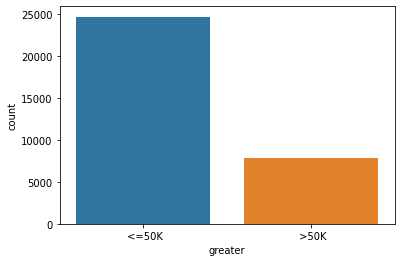

In [5]:
# dfformatted = df.greater.map({' <=50K': 0, ' >50K': 1})
sns.countplot(x="greater", data=df)
plt.show()


greater  hours-per-week
 <=50K   40                11970
         50                 1543
         20                 1146
         45                 1139
         35                 1102
                           ...  
 >50K    73                    1
         89                    1
         95                    1
         96                    1
         97                    1
Name: hours-per-week, Length: 173, dtype: int64


<AxesSubplot:xlabel='greater,hours-per-week'>

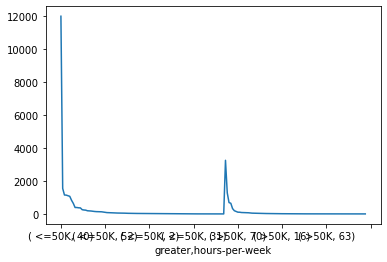

In [6]:
column = 'hours-per-week'
dfNativeCountry = df[[column, 'greater']]
dfTableMC = dfNativeCountry.groupby('greater')[column].value_counts()
print(dfTableMC)
dfTableMC.plot()


greater  ocupation         
 <=50K    Adm-clerical         3263
          Craft-repair         3170
          Other-service        3158
          Sales                2667
          Prof-specialty       2281
          Exec-managerial      2098
          Machine-op-inspct    1752
          ?                    1652
          Handlers-cleaners    1284
          Transport-moving     1277
          Farming-fishing       879
          Tech-support          645
          Protective-serv       438
          Priv-house-serv       148
          Armed-Forces            8
 >50K     Exec-managerial      1968
          Prof-specialty       1859
          Sales                 983
          Craft-repair          929
          Adm-clerical          507
          Transport-moving      320
          Tech-support          283
          Machine-op-inspct     250
          Protective-serv       211
          ?                     191
          Other-service         137
          Farming-fishing       115


<AxesSubplot:ylabel='greater,ocupation'>

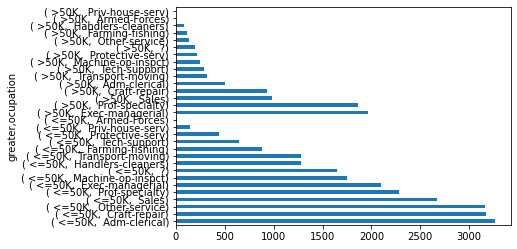

In [7]:
column = 'ocupation'
dfNativeCountry = df[[column, 'greater']]
dfTableMC = dfNativeCountry.groupby('greater')[column].value_counts()
print(dfTableMC)
dfTableMC.plot(kind='barh')


In [ ]:
dfFormatted = df['greater'] == '>50K'
%matplotlib inline
sns.pairplot(dfFormatted, x_vars=['age', 'education-num'], y_vars='sex', aspect=0.7, kind='reg')


TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

In [8]:
df['sex'] = df['sex'] == 'Male'
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=42)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,ocupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater
234,28,Private,76714,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,False,0,0,55,United-States,>50K
26879,41,Private,178431,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,False,0,0,40,Taiwan,<=50K
19182,53,Private,290640,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,False,0,0,50,Germany,>50K
13485,31,Private,215297,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,False,0,0,45,United-States,<=50K
9625,34,Local-gov,188682,Bachelors,13,Married-spouse-absent,Prof-specialty,Not-in-family,White,False,0,0,40,United-States,<=50K


In [22]:
teste = df[:9049].values
treino = df[9049:].values

print(treino.shape)
print(teste.shape)
# 30162 * 0.3

(23512, 15)
(9049, 15)


In [23]:
# from sklearn.preprocessing import StandardScaler

# Transforma em valor numérico, as colunas que contém texto
df_c = pd.get_dummies(
    df, columns=['race', 'workclass', 'education'])
df_c.head()
# Normalização
# scaler = StandardScaler()
# scaler.fit(df_c)
# df_c = scaler.transform(df_c)


,age,fnlwgt,education-num,marital-status,ocupation,relationship,sex,capital-gain,capital-loss,hours-per-week,...,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
1674,47,170846,12,Married-civ-spouse,Adm-clerical,Wife,False,0,0,40,...,0,1,0,0,0,0,0,0,0,0
1380,25,208999,10,Separated,Adm-clerical,Own-child,False,0,0,40,...,0,0,0,0,0,0,0,0,0,1
2097,56,160829,9,Divorced,Adm-clerical,Not-in-family,False,0,0,46,...,0,0,0,0,0,1,0,0,0,0
11646,23,287988,13,Never-married,Prof-specialty,Not-in-family,False,0,0,40,...,0,0,0,1,0,0,0,0,0,0
17007,25,195914,10,Never-married,Sales,Own-child,False,3418,0,30,...,0,0,0,0,0,0,0,0,0,1


In [24]:
from sklearn.model_selection import train_test_split

X = df_c.drop(columns=['greater', 'race', 'workclass', 'education', 'native-country', 'marital-status', 'ocupation', 'relationship'])
y = df_c.greater

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X.shape

KeyError: "['race', 'workclass', 'education'] not found in axis"

In [ ]:
# ELIMINACAO SEQUENCIAL

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# cria um vetor que vai auxiliar a identificar quais registros são considerados
# no treino e quais não são, como se fosse um filtro
indices = []
for _ in range(len(X_train)):
  indices.append(True)

# faz a logica de tentar eliminar cada registro e ver se está correto
for i in range(len(X_train)):
  indices[i] = False
  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(X_train[indices], y_train[indices])

  pred = model.predict([X_train.values[i]])
  if pred != y_train.values[i]:
    indices[i] = True

print("Quantas amostras de treino sobraram:", len(X_train[indices]))

# calcula o resultado final depois da redução

model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train[indices], y_train[indices])
pred = model.predict(X_test)

print("Acurácia:", (pred == y_test).sum() / len(X_test) * 100)


Quantas amostras de treino sobraram: 7612
Acurácia: 75.33654812135825


# Dados para treino e teste

• Embaralhar dados para melhorar a acertividade dos treinos e testes para não correr o risco dos dados estarem ordenados de alguma maneira.

• Selecionar as colunas com maior relevância para o problema.

• Remover as linhas com dados nulos ou preencher de alguma maneira para não prejudicar a predição. "Já foi feito anteriormente utilizando o comando: df = df.dropna()"

In [13]:
# Embaralhamento das linhas da base
df = df.sample(len(df))

In [14]:
# Colunas de maior relevância que serão utilizadas para a classificação
columns = ['workclass','education','education-num','marital-status','relationship', 'race', 'sex', 'hours-per-week', 'native-country']

# Criação de um DataFrame sem a coluna de predição
df_c = df[columns]

# Definindo 'y' com a coluna de predição
y = df['greater']

### Dummies
• Como não existem apenas dados numéricos, mas também dados categóricos, para construir os modelos de predição pelo 'Sickit Learn' é necessário transformar as colunas que possuem valores em texto em valores númericos. Isso é feito pelo get_dummies

### StandartScaler
• Para evitar o cenário de haver colunas com valores grandes, por exemplo, 30.000 e colunas com valores pequenos 1.000 e isso impactar os resultados, é interessante colocar esses valores dentro de um intervalo de 0 e 1. Isso é feito utilizando o StandartScaler

In [15]:
from sklearn.preprocessing import StandardScaler

# Transforma em valor numérico, as colunas que contém texto
df_c = pd.get_dummies(df_c, columns=['workclass','education','marital-status','relationship','race', 'sex', 'native-country'])

# Normalização
scaler = StandardScaler()
scaler.fit(df_c)
df_c = scaler.transform(df_c)

### Hold-out

Hold-out é um método de separação de valores para treino e teste

Foi escolhido a proporção de 70% treino e 30% teste (proporção padrão)

In [16]:
# Capturando a quantidade que será utilizado para treino e para teste

# Valor total
print(len(df))

# 70% da base
train_percentage = int(len(df)*70/100)
print(train_percentage)

32561
22792


In [17]:
# Criação da massa de treino e teste, utilizando o Holdout
X_train, X_test = df_c[:train_percentage], df_c[train_percentage:]
y_train, y_test = y[:train_percentage], y[train_percentage:]

# Modelo KNN

• Criar modelo KNN utilizando valor fixo de vizinhos

• Criar modelo KNN utilizando GridSearch para verificar o melhor número de vizinhos para a maior acurácia

• Criar modelo KNN utilizando validação cruzada para garantir que todos os dados foram, alguma vez utilizados como teste e como treino

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Aplicação do modelo KNN e treinamento do mesmo
modelo = KNeighborsClassifier(n_neighbors = 13)
modelo.fit(X_train, y_train)

# Aplicação da predição no modelo
y_pred = modelo.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
 
# Demonstração da acurácia encontrada pelo modelo
accuracy_score(y_pred, y_test)

0.8154365851161839

In [20]:
from sklearn.metrics import classification_report
 
# Exibindo relatório da precisão de acertos dos valores menores e maiores que 50k
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       <=50K       0.90      0.86      0.88      7804
        >50K       0.53      0.63      0.58      1965

    accuracy                           0.82      9769
   macro avg       0.72      0.75      0.73      9769
weighted avg       0.83      0.82      0.82      9769



## KNN: GridSearch

Verificar o melhor número de vizinhos para a maior acurácia

In [21]:
from sklearn.model_selection import GridSearchCV

# Definir o intervalo de parametros para teste
params = {'n_neighbors':[1,5,9,13,101,207]}
clf = GridSearchCV(modelo, params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'n_neighbors': [1, 5, 9, 13, 101, 207]})

In [39]:
# Exibir gráfico mostrando as médias com a melhor acurácia
display(pd.DataFrame(clf.cv_results_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025812,0.006023,0.836299,0.150884,1,{'n_neighbors': 1},0.770327,0.768092,0.770886,0.767253,0.762996,0.767911,0.002804,6
1,0.019684,0.000142,1.188673,0.077240,5,{'n_neighbors': 5},0.803018,0.803018,0.806929,0.808326,0.802963,0.804851,0.002310,5
2,0.020161,0.000868,1.181182,0.075618,9,{'n_neighbors': 9},0.810003,0.821738,0.814753,0.810562,0.815819,0.814575,0.004240,4
3,0.020000,0.000712,1.180115,0.067204,13,{'n_neighbors': 13},0.813635,0.811959,0.817547,0.818664,0.816657,0.815692,0.002505,3
4,0.020384,0.000682,1.317520,0.175540,101,{'n_neighbors': 101},0.813076,0.825650,0.827326,0.813076,0.817216,0.819269,0.006108,1
5,0.019825,0.000196,1.279775,0.073196,207,{'n_neighbors': 207},0.813356,0.821459,0.822856,0.816150,0.814701,0.817704,0.003768,2


## KNN: Validação cruzada

Garante que todos os dados foram, alguma vez utilizados como teste e como treino

In [44]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# Atribuição de valor de X e y
X = df_c
y = df["greater"].values

# Insere as informação desejadas para a realização da Validação Cruzada, no caso, com 15 divisões
kf = KFold(n_splits = 15, random_state = 42, shuffle = True)

# Inicializa vetor de scores, responsável por armazenar dados de cada iteração da Validação Cruzada
scores = []

# Percorre cada iteração da Validação Cruzada
for train_index, test_index in kf.split(X):
    
    # Define os valores de treino e teste, baseado com a iteração da Validação Cruzada
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Aplicação do modelo KNN e treinamento do mesmo
    modelo = KNeighborsClassifier(n_neighbors = 13)
    modelo.fit(X_train, y_train)
    # Aplicação da predição no modelo
    y_pred = modelo.predict(X_test)
    # Armazena os valores de cada iteração da Validação Cruzada
    score = modelo.score(X_test, y_test)
    scores.append(score)

# Transforma em array os valores dos scores de forma padronizada
scores = np.array(scores)

# Printa a média e o desvio da padrão dos modelos encontrados, além de printar os scores encontrados
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

R2: 0.75 (+/- 0.03)
[0.74721408 0.73313783 0.73372434 0.77595308 0.75058685 0.74295775
 0.74823944 0.74647887 0.75762911 0.76819249 0.73650235 0.7435446
 0.77288732 0.74765258 0.75704225]


# Modelo DecisionTree

Modelo de DecisionTree se baseia em fazer boas perguntas, por exemplo, fazer boas validações entre as colunas para chegar em dados mais "extremos", por exemplo. X > y => 90% sim. Esse é um cenário muito difícil mas é um exemplo.

In [58]:
# Resetando
# Colunas de maior relevância que serão utilizadas para a classificação
columns = ['workclass','education','education-num','marital-status','relationship', 'race', 'sex', 'hours-per-week', 'native-country']

# Criação de um DataFrame sem a coluna de predição
df_c = df[columns]

# Definindo 'y' com a coluna de predição
y = df['greater']

# Transforma em valor numérico, as colunas que contém texto
df_c = pd.get_dummies(df_c, columns=['workclass','education','marital-status','relationship','race', 'sex', 'native-country'])

# Normalização
scaler = StandardScaler()
scaler.fit(df_c)
df_c = scaler.transform(df_c)

# Criação da massa de treino e teste, utilizando o Holdout
X_train, X_test = df_c[:train_percentage], df_c[train_percentage:]
y_train, y_test = y[:train_percentage], y[train_percentage:]

In [59]:
from sklearn.tree import DecisionTreeClassifier
 
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
from sklearn.metrics import accuracy_score

# Fazendo a predição
y_pred = modelo.predict(X_test)
accuracy_score(y_pred, y_test)

0.809504329447058

In [61]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       <=50K       0.91      0.85      0.88     11942
        >50K       0.49      0.64      0.56      2725

    accuracy                           0.81     14667
   macro avg       0.70      0.74      0.72     14667
weighted avg       0.83      0.81      0.82     14667



In [62]:
modelo.feature_importances_

array([2.08729795e-01, 1.58140335e-01, 9.48119500e-03, 9.03761689e-03,
       1.01922147e-02, 0.00000000e+00, 1.58098234e-02, 1.37402841e-02,
       1.10217944e-02, 9.11379657e-03, 0.00000000e+00, 3.38745584e-04,
       1.51164519e-03, 3.89458444e-04, 4.17881265e-04, 0.00000000e+00,
       8.70477935e-04, 8.60534478e-04, 3.92752589e-03, 5.21395962e-03,
       4.29296987e-03, 3.64764621e-03, 8.87117924e-03, 4.68041563e-03,
       3.00918857e-06, 1.59907139e-03, 5.90144101e-03, 5.20067573e-03,
       1.21922260e-03, 3.47902189e-01, 1.28081240e-03, 6.43459004e-03,
       3.46202478e-03, 3.85596696e-03, 6.32391466e-03, 7.28433396e-03,
       3.73542749e-03, 5.89291029e-03, 3.18681247e-03, 6.87935311e-03,
       2.40205693e-03, 4.61293797e-03, 9.58441553e-03, 2.33546390e-03,
       1.29256631e-02, 7.98563343e-03, 8.55715006e-03, 6.76849430e-03,
       1.05766155e-03, 4.36920840e-03, 9.81604066e-04, 1.58040121e-04,
       1.81041875e-03, 6.81838681e-04, 3.71544286e-04, 1.13040985e-03,
      

## RandomForestClassifier

Uma floresta aleatória é um meta estimador que ajusta vários classificadores de árvore de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o ajuste excessivo.

In [63]:
from sklearn.ensemble import RandomForestClassifier
 
modelo = RandomForestClassifier(n_estimators = 200, max_depth = 5)
modelo.fit(X_train, y_train)
 
y_pred = modelo.predict(X_test)
accuracy_score(y_pred, y_test)

0.8159814549669325